# Projekt

### Spis treści 
<a id="spis"></a>

1. [Generator zbiorow](#generator)
2. [Wybor zbiorow](#ustalenieZbiorow)
3. [Wizualizacja dla algorytmu Jarvisa](#jarvis)

    - [Jarvis dla zbioru typu a](#jarvisa)
    - [Jarvis dla zbioru typu b](#jarvisb)
    - [Jarvis dla zbioru typu c](#jarvisc)
    - [Jarvis dla zbioru typu d](#jarvisd)
    
4. [Wizualizacja dla algorytmu Grahama](#graham)

    - [Graham dla zbioru typu a](#grahama)
    - [Graham dla zbioru typu b](#grahamb)
    - [Graham dla zbioru typu c](#grahamc)
    - [Graham dla zbioru typu d](#grahamd)
    
5. [Wizualizacja dla algorytmu Gorna-dolna](#goradol)

    - [Gorna-dolna dla zbioru typu a](#goradola)
    - [Gorna-dolna dla zbioru typu b](#goradolb)
    - [Gorna-dolna dla zbioru typu c](#goradolc)
    - [Gorna-dolna dla zbioru typu d](#goradold)
    
6. [Wizualizacja dla algorytmu Przyrostowego](#przyrost)

    - [Przyrostowy dla zbioru typu a](#przyrosta)
    - [Przyrostowy dla zbioru typu b](#przyrostb)
    - [Przyrostowy dla zbioru typu c](#przyrostc)
    - [Przyrostowy dla zbioru typu d](#przyrostd)
    
7. [Wizualizacja dla algorytmu Dziel i zwyciezaj](#dziel)
    - [Dziel i zwyciezaj dla zbioru typu a](#dziela)
    - [Dziel i zwyciezaj dla zbioru typu b](#dzielb)
    - [Dziel i zwyciezaj dla zbioru typu c](#dzielc)
    - [Dziel i zwyciezaj dla zbioru typu d](#dzield)
    
8. [Wizualizacja dla algorytmu Chana](#chan)
    - [Chan dla zbioru typu a](#chana)
    - [Chan dla zbioru typu b](#chanb)
    - [Chan dla zbioru typu c](#chanc)
    - [Chan dla zbioru typu d](#chand)
    
9. [Wizualizacja dla algorytmu Quick hull](#quickhull)
    - [Quick hull dla zbioru typu a](#quickhulla)
    - [Quick hull dla zbioru typu b](#quickhullb)
    - [Quick hull dla zbioru typu c](#quickhullc)
    - [Quick hull dla zbioru typu d](#quickhulld)
    
10. [Pomiary czasu](#pomiary)
    - [Chmura punktów](#pomiary-chmura)
        - [Algorytm Grahama](#pomiary-chmura-graham)
        - [Algortym "Górna-dolna"](#pomiary-chumra-gornadolna)
        - [Algorytm Chana](#pomiary-chmura-chan)
        - [Algorytm QuickHull](#pomiary-chmura-quickhull)
        - [Algorytm dziel i zwyciężaj](#pomiary-chmura-dziel)
        - [Algorytm przyrostowy](#pomiary-chmura-przyrost)
        - [Algorytm Jarvisa](#pomiary-chmura-jarvis)
        - [Ujęcie zbiorcze](#pomiary-chmura-zbiorczy)
        - [Ujęcie zbiorcze bez Chana i Jarvisa](#pomiarcy-chmura-zbiorczy-2)
    - [Punkty na okręgu](#pomiary-kolo)
        - [Algorytm Grahama](#pomiary-kolo-graham)
        - [Algortym "Górna-dolna"](#pomiary-kolo-gornadolna)
        - [Algorytm Chana](#pomiary-kolo-chan)
        - [Algorytm QuickHull](#pomiary-kolo-quickhull)
        - [Algorytm dziel i zwyciężaj](#pomiary-kolo-dziel)
        - [Algorytm przyrostowy](#pomiary-kolo-przyrost)
        - [Algorytm Jarvisa](#pomiary-kolo-jarvis)
        - [Ujęcie zbiorcze](#pomiary-kolo-zbiorczy)
         -[Ujęcie zbiorcze bez Jarvisa](#pomiary-kolo-zbiorczy-2)
    - [Punkty na obwodzie prostokąta](#pomiary-prost)
        - [Algorytm Grahama](#pomiary-prost-graham)
        - [Algortym "Górna-dolna"](#pomiary-prost-gornadolna)
        - [Algorytm Chana](#pomiary-prost-chan)
        - [Algorytm QuickHull](#pomiary-prost-quickhull)
        - [Algorytm dziel i zwyciężaj](#pomiary-prost-dziel)
        - [Algorytm przyrostowy](#pomiary-prost-przyrost)
        - [Algorytm Jarvisa](#pomiary-prost-jarvis)
        - [Ujęcie zbiorcze](#pomiary-prost-zbiorczy)
        - [Ujęcie zbiorcze bez Chana](#pomiary-prost-zbiorczy-2)
    - [Puntky na kwadracie (2 boki + przekątne)](#pomiary-kw)
        - [Algorytm Grahama](#pomiary-kw-graham)
        - [Algortym "Górna-dolna"](#pomiary-kw-gornadolna)
        - [Algorytm Chana](#pomiary-kw-chan)
        - [Algorytm QuickHull](#pomiary-kw-quickhull)
        - [Algorytm dziel i zwyciężaj](#pomiary-kw-dziel)
        - [Algorytm przyrostowy](#pomiary-kw-przyrost)
        - [Algorytm Jarvisa](#pomiary-kw-jarvis)
        - [Ujęcie zbiorcze](#pomiary-kw-zbiorczy)
        - [Ujęcie zbiorcze bez Chana](#pomiary-kw-zbiorczy-2)

<a id='section_id'></a>

### Importy
<a id="konfiguracja"></a>

<a id='section_id'></a>

In [1]:
from lib import *
import numpy as np
from vis.divide_conq_vis import divide_conq_vis
from vis.graham_vis import *
from vis.increase_vis import *
from vis.divide_conq_vis import *
from vis.jarvis_vis import *
from vis.lowerupper_vis import *
from vis.chan_vis import *
from vis.quickhull_vis import *
# Funkcje wizualizujące Łukasza

# wypisywanie otoczek w czytelnej formie
from pprint import pprint
from copy import deepcopy

<a id='section_id'></a>

<a id='section_id'></a>

# Genertor zbiorów punktów

<a id="generator"></a>
[spis treści](#spis)

<a id='section_id'></a>

<a id='section_id'></a>

In [2]:
import random 
import math
def makeAset(n,x1=-100,y1=100,x2=-100,y2=100):
    return [(random.randint(x1,y1), random.randint(x2,y2)) for i in range(n)]

def makeBset(n,xs=0,ys=0,r=100):
    b = []
    for _ in range(n):
        t = random.random() * (2*math.pi)
        b.append((r*math.sin(t)-xs, r*math.cos(t)-ys))
    return b
        
def makeCset(n,x1=-100,y1=-100,x2=100,y2=-100,x3=100,y3=100,x4=-100,y4=100): # wierzcholki musza byc podawane 
# kolejno w przeciwnym kierunku do ruchu wskazowek 
# zegara makeCset tworzy wszelakie czworokaty, bioirac pod uwage ze prostokaty moglyby byc przechylone wyznaczanie zbiorow
# punktow dla nich bylo by rownie trudne
    C=[]
    a=np.sqrt((x1-x2)**2+(y1-y2)**2)
    b=np.sqrt((x2-x3)**2+(y2-y3)**2)
    c=np.sqrt((x3-x4)**2+(y3-y4)**2)
    d=np.sqrt((x1-x4)**2+(y1-y4)**2)
    obw=a+b+c+d
    s=random.random()*obw

    for _ in range(n):
        s =random.random() * obw
        if s<=a:
            C.append(((x1+(s/a)*(x2-x1),y1+(y2-y1)*(s/a))))
        elif s<=a+b:
            C.append((x2+(x3-x2)*((s-a)/b),y2+(y3-y2)*((s-a)/b)))
        elif s<=a+b+c:
            C.append((x3+(x4-x3)*((s-a-b)/c),y3+(y4-y3)*((s-b-a)/c)))
        else:
            C.append((x4+(x1-x4)*((s-a-b-c)/d),y4+(y1-y4)*((s-b-a-c)/d)))
    return C

def makeDset(x1=0,y1=0,x2=10,y2=0,x3=10,y3=10,x4=0,y4=10,n1=100,n2=100,n=0):
    if(n!=0):
        n1=n
        n2=n
    D=[]
    D.append((x1,y1))
    D.append((x2,y2))
    D.append((x3,y3))
    D.append((x4,y4))
    a=np.sqrt((x2-x1)**2+(y2-y1)**2)
    d=np.sqrt((x3-x1)**2+(y3-y1)**2)
    
    for _ in range(n1):
        s=random.random()*a
        D.append((x1+(x2-x1)*(s/a),y1+(y2-y1)*(s/a)))
        D.append((x4+(x1-x4)*(s/a),y4+(y1-y4)*(s/a)))
    for _ in range(n2):
        s=random.random()*d
        D.append((x1+(x3-x1)*(s/d),y1+(y3-y1)*(s/d)))
        D.append((x2+(x4-x2)*(s/d),y2+(y4-y2)*(s/d)))
    return D   

<a id='section_id'></a>

## Wybor zbiorow

<a id="ustalenieZbiorow"></a>
[spis treści](#spis)


In [ ]:
a=makeAset(n=10)
b=makeBset(n=10)
c=makeCset(n=10)
d=makeDset(n=10)

# Sekcja Wizualizacji

<a id="wizualizacja"></a>


<a id='section_id'></a>

## Algorytm Jarvisa

<a id="jarvis"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)


<a id='section_id'></a>

### Opis

<a id='section_id'></a>

* Wyznaczenie najniżej położonego punktu spośród danego zbioru. Jeśli istnieje więcej
niż jeden taki punkt, to wybieramy ten o najmniejszej odciętej.

* Wyznaczaniu kolejnych punktów otoczki i dodawaniu ich do listy wynikowej, dopóki
kolejny punkt otoczki dla punktu bieżącego nie jest pierwszym punktem otoczki.
Wyznaczanie kolejnych punktów odbywa się w następujący sposób:
    * Jeśli dany punkt należy do otoczki, to następny punkt należący do otoczki, to taki punkt, że wszystkie inne punkty leżą na lewo od odcinka łączącego dany punkt z otoczki z tym punktem.
 
* Tak utworzona lista jest naszą otoczką.

<a id='section_id'></a>

### Jarvis - wizualizacja dla chmury punktów

<a id="jarvisa"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot=jarvis_vis(np.array(a))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie kołowym

<a id="jarvisb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(b))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="jarvisc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook 

ch, plot = jarvis_vis(np.array(c))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="jarvisd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

In [ ]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(d))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()



<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm Grahama

<a id="graham"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

### Opis

* Wyznaczenie najniżej położonego punktu spośród danego zbioru. Jeśli istnieje więcej
niż jeden taki punkt, to wybieramy ten o najmniejszej odciętej.

* Sortowania reszty punktów względem kąta jaki tworzą one z punktem najniższym, 
a dodatnią osią OX.

* Położenie najniższego punktu na stos wraz z pierwszym punktem z posortowanej reszty.

* Iteracji po reszcie posortowany punktów:
    * Jeżeli kolejny punkt znajduje się po prawej stronie odcinka utworzonego z dwóch
ostatnich punktów ze stosu,bądź jest z nim współliniowy, to usuwamy ostatni punkt stosu.
    * Kładziemy rozważany punkt na stos.
* Na końcu zwracamy całą zawartość stosu - jest to nasza otoczka wypukła.

<a id='section_id'></a>

<a id='section_id'></a>

### Graham - wizualizacja dla chmury punktów

<a id="grahama"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()


<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie kołowym

<a id="grahamb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

# przekazujemy kopię listy punktów, poinieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="grahamac"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot=graham_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="grahamd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)
            

In [ ]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm gorna - dolna

<a id="goradol"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Opis


1. Sortujemy punkty rosnąco po odciętych (w przypadku rówych, mniejszy jest punkt o mniejszej rzędnej). 
2. Pierwsze dwa punkty z posortowanego zbioru wpisujemy do zbioru punktów otoczki górnej oraz dolnej.
3. Iterujemy po zbiorze punktów zaczynając od i = 2 (trzeciego punktu), niech P będzie bieżącym punktem: 
    1. Dopóki górna (dolna) otoczka ma co najmniej 2 punkty i P nie znajduje się po prawej (lewej) stronie odcinka skierowanego utworzonego przez ostatniej dwa punkty otoczki (ostatni jest końcem odcinka), wykonujemy 3.2:
    2. Usuwamy ostatni punkt z otoczki górej (dolnej). 
    3. Dodajemy P do punktów otoczki górnej (dolnej). 
4. Odwracamy kolejność wierzchołków w otoczce dolnej. 
5. Łączymy zbioru punktów otoczki górnej oraz dolnej. 
6. Zwracamy złączony zbiór punktów otoczki. 
    

<a id='section_id'></a>

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla chmury punktów

<a id="goradola"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = lower_upper_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie kołowym

<a id="goradolb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = lower_upper_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="goradolc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = lower_upper_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="goradold"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = lower_upper_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm przyrostowy

<a id="przyrost"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Opis

1. Dodajemy pierwsze 3 punkty do zbioru punktów otoczki. 
2. Iterujemy po pozostałych punktach. Niech P będzie punktem bieżącym:
    1. Jeżeli P nie należy do wnętrza obecnie znanej otoczki wykonujemy 2.2 oraz 2.3.
    2. Znajdujemy styczne do obecnie znanej otoczki poprowadzone przez punkt P.
    3. Aktualizujemy otoczkę.
    4. Zwracamy punkty otoczki.
    
Sortując punkty po odciętych, możemy zrezygnować z testowania przynależności punktu do wnętrza otoczki, zostając przy tej samej klasie złożoności. 


<a id='section_id'></a>

### Przyrostowy - wizualizacja dla chmury punktów

<a id="przyrosta"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy- wizualizacja dla punktów o rozkładzie kołowym

<a id="przyrostb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="przyrostc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="przyrostd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook


ch, plot = increase_with_sorting_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm dziel i zwyciezaj

<a id="dziel"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Opis

Standardowe zastosowanie metody dziel i zwyciężaj: 

1. Dzielimy punkty na mniejsze bądź równe i większe względem mediany z odciętych tak długo aż każdy wydzielony podzbiór nie ma mocy mniejszej od pewnej zadanej stałej k.
2. Znajdujemy otoczki zbiorów <= k elementowych za pomocą innego algorytmu.
3. Tak uzyskane otoczki łączymy w odpowiedniej kolejności (odwrotnej do kolejności dzielenia wzorów)

<a id='section_id'></a>

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla chmury punktów

<a id="dziela"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = divide_conq_vis(a.copy(), k=2)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy- wizualizacja dla punktów o rozkładzie kołowym

<a id="przyrostb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

In [ ]:
%matplotlib notebook

k = 10

ch, plot = divide_conq_vis(a.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla punktów o rozkładzie kołowym

<a id="dzielb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(b.copy(), k)

print(f'Liczba punktow  otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="dzielc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

k = 5

ch, plot = divide_conq_vis(c.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
# pprint(ch)

plot.draw()


<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="dzield"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(d.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm Chana

<a id="chan"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Opis 

1. Pierwsza, która składa się na:
    1. Podział zbioru punktów Q na podzbiory Q(i) o w miarę równych ilościach punktów w nich zawartych, z czego żaden nie zawiera więcej niż dane m. 
    2. Wyznaczenie otoczek C(i) dla każdego zbioru Q(i).
2. Druga polega na wykonaniu algorytmu na wzór Jarvisa:
    1. Zaczynamy od wybrania punktu najniższego należącego do danego zbioru punktów
    2. Jeżeli mamy dany wierzchołek należący do otoczki, to możemy wyznaczyć kolejny w następujący sposób:
        1. Dla każdej podotoczki C(i) wyznaczamy punkt styczny q(i) do tej otoczki.
        2. Spośród zbioru takich punktów q(i) oraz kolejnego punktu z podotoczki, do której dany punkt należy wybieramy taki punkt, że wszystkie pozostałe punkty znajdują się na lewo od odcinka utworzonego  z wierzchołka należącego do otoczki głównej i niego.
        3. Tak wybrany punkt jest kolejnym punktem otoczki głównej.
    3. Wyznaczamy kolejne punkty otoczki, dopóki następny punkt otoczki nie jest pierwszym wierzchołkiem otoczki. Jeżeli nie znajdziemy w ten sposób pierwszego punktu otoczki w m iteracjach, to przerywamy
wykonanie algorytmu. 


Główną część algorytmu wykonujemy dla m=4. Jeśli dla danego m Algorytm został przerwany, to podnosimy m do kwadratu i próbujemy dalej. Jeśli m>ilość punktów m=ilość punktów - algorytm
sprowadza się wtedy do algorytmu Grahama.

<a id='section_id'></a>

<a id='section_id'></a>

### Chan - wizualizacja dla chmury punktów

<a id="chana"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
a = makeAset(n=100)
plot=chan_vis(a,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan  - wizualizacja dla punktów o rozkładzie kołowym

<a id="chanb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=chan_vis(b,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="chanc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

plot=chan_vis(c,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="chand"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=chan_vis(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm QuickHull

<a id="quickhull"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Opis


1. Algorytm rozpoczynamy od wyznaczenie dwóch punktów skrajnych a,b - tj. o najmniejszej i największej współżędnej x-owej.
2. Następnie uruchamiamy funkcję rekurencyjnego znajdowania łuku należącego do otoczki między danymi punktami należącymi do tej otoczki p,q na prawo od odcinka |p,q|. Otoczką jest suma punktów a, wyniku działania funkcji rekurencyjnej dla odcinka |a,b|,b oraz wyniku działania funkcji rekurencyjnej dla |b,a|
3. Funkcja rekurencyjnego wyznaczenia łuku należącego do otoczki między punktami p i q polega na :
    1. Wyznaczeniu najbardziej oddalonego punktu na prawo od —p,q— jeśli są punkty po prawej.
    2. Jeśli nie ma takich punktów, to takiego łuku nie ma i zwracamy pustą tablicę. 
    3. W przeciwnym przypadku p,q należą do otoczki, to wyznaczony punkt skrajny r musi należeć do otoczki.
    4. Skoro p,k,r należy do otoczki, to wszystkie wierzchołki wewnątrz trójkąta pkr na pewno do najmniej nie należą - usuwamy je.
    5. Szukany łuk, to suma działania tej samej funkcji dla punktów p,r, punktu r , oraz wyniku tej funkcji dla punktów r,q w zadanej kolejności. 
    6. Na koniec zwracamy wyznaczony w ten sposób łuk. 

<a id='section_id'></a>

### QuickHull - wizualizacja dla chmury punktów

<a id="quickhulla"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

a = makeAset(n = 1000)
plot=quickHull_vis(a,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull - wizualizacja dla punktów o rozkładzie kołowym

<a id="quickhullb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=quickHull_vis(b,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="quickhullc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=quickHull_vis(c,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="quickhulld"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=quickHull_vis(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja pomiarów czasu

<a id="pomiary"></a>

[Spis treści](#spis)


### Funkcja do pomiaru czasów i wizualizacji wyników

<a id='section_id'></a>

In [3]:
import time

from pure.graham import *
from pure.jarvis import *
from pure.divide_conq import *
from pure.chan import *
from pure.increase import *
from pure.lowerupper import *
from pure.quickhull import *

from lib.timemeasure import *

def generate_plot(xdatas, ydatas, xlabel, ylabel, title):
    for xdata, ydata in zip(xdatas, ydatas):
        plt.plot(xdata, ydata, ls = '--')
        plt.scatter(xdata, ydata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

## Pomiary

<a id="pomiary-chmura"></a>
### Chmura punktów  
[Spis treści](#spis)

<a id='section_id'></a>

In [ ]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 1000 + i * 400 for i in range(10) ]

funcs = [graham, lower_upper, chan, quickHull, divide_conq, increase_with_sorting,jarvis]

exectimes_a = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeAset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
#             print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is divide_conq:
#             print(func, n)
            exectimes_a[fi][i] = avg_exec_time(func, n / 10, points=points)
            continue
        
#         print(func, n)
        exectimes_a[fi][i] = avg_exec_time(func, points=points.copy())
        
#         print(exectimes_a[fi][i])
        
    

save_data_csv('./tests/cloud', exectimes_a)
    
pprint(exectimes_a)


<a id="pomiary-chmura-graham"></a>
### Algorytm Grahama  
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algorytm "górna-dolna"
<a id="pomiary-chmura-gornadolna"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook


generate_plot([ns], [exectimes_a[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

### Algorytm Chana
<a id="pomiary-chmura-chan"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

### Algorytm QuickHull
<a id="pomiary-chmura-quickhull"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

### Algorytm dziel i zwyciężaj
<a id="pomiary-chmura-dziel"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm dziel i zwyciezaj')

plt.show()

### Algorytm przyrostowy
<a id="pomiary-chmura-przyrost"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[5]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm przyrostowy')

plt.show()

### Algorytm Jarvisa
<a id="pomiary-chmura-graham"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[6]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Ujęcie zbiorcze
<a id="pomiary-chmura-zbiorczy"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_a))], exectimes_a, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Dziel i zwyciezaj','Przyrostowy','Jarvis'))
plt.show()

### Ujęcie zbiorcze bez algorytmów $O(n^2)$
<a id="pomiary-chmura-zbiorczy-2"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_a)-2)], [exectimes_a[i] for i in range(len(exectimes_a)) if i not in [2, 6]], 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze (bez Chna i Jarvisa)')
plt.legend(labels=('Graham', 'lowerupper', 'QuickHull', 'Dziel i zwyciezaj','Przyrostowy'))
plt.show()

### Rozkład kołowy
<a id="pomiary-kolo"></a>
[Spis treści](#spis)

<a id='section_id'></a>

In [4]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 100 + i * 100 for i in range(10) ]
funcs = [graham, lower_upper, chan, quickHull, divide_conq, increase_with_sorting, jarvis]

exectimes_b = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeBset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is divide_conq:
            exectimes_b[fi][i] = avg_exec_time(func, 10, points=points)
            continue
        
        print(func, n)
        exectimes_b[fi][i] = avg_exec_time(func, points=points.copy())
        
save_data_csv('./tests/circle', exectimes_b)
    
pprint(exectimes_b)

<function graham at 0x7fe72587f040> 100
<function lower_upper at 0x7fe725898820> 100
<function chan at 0x7fe7258980d0> 100
(0, 1)
(0, 1)
(15, 1)
(15, 1)
(24, 1)
(24, 1)
(11, 1)
(11, 1)
(0, 1)
(0, 1)
(6, 2)
(6, 2)
(4, 1)
(4, 1)
(2, 1)
(2, 1)
(4, 2)
(4, 2)
(4, 3)
(4, 3)
(1, 2)
(1, 2)
(6, 3)
(6, 3)
(0, 2)
(0, 2)
(4, 4)
(4, 4)
(5, 2)
(5, 2)
(0, 3)
(0, 3)
(6, 4)
(6, 4)
(6, 5)
(6, 5)
(0, 4)
(0, 4)
(6, 6)
(6, 6)
(0, 1)
(0, 1)
(0, 2)
(0, 2)
(0, 3)
(0, 3)
(0, 4)
(0, 4)
(0, 5)
(0, 5)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(0, 8)
(0, 8)
(0, 9)
(0, 9)
(0, 10)
(0, 10)
(0, 11)
(0, 11)
(0, 12)
(0, 12)
(0, 13)
(0, 13)
(0, 14)
(0, 14)
(0, 15)
(0, 15)
(0, 16)
(0, 16)
(0, 17)
(0, 17)
(0, 18)
(0, 18)
(0, 19)
(0, 19)
(0, 20)
(0, 20)
(0, 21)
(0, 21)
(0, 22)
(0, 22)
(0, 23)
(0, 23)
(0, 24)
(0, 24)
(0, 25)
(0, 25)
(0, 26)
(0, 26)
(0, 27)
(0, 27)
(0, 28)
(0, 28)
(0, 29)
(0, 29)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 32)
(0, 32)
(0, 33)
(0, 33)
(0, 34)
(0, 34)
(0, 35)
(0, 35)
(0, 36)
(0, 36)
(0, 37)
(0, 37)
(0, 38)
(0, 38)
(

<function graham at 0x7fe72587f040> 400
<function lower_upper at 0x7fe725898820> 400
<function chan at 0x7fe7258980d0> 400
(0, 1)
(0, 1)
(66, 1)
(66, 1)
(25, 1)
(25, 1)
(15, 1)
(15, 1)
(0, 1)
(0, 1)
(16, 1)
(16, 1)
(0, 2)
(0, 2)
(15, 1)
(15, 1)
(5, 1)
(5, 1)
(10, 1)
(10, 1)
(18, 1)
(18, 1)
(11, 1)
(11, 1)
(21, 1)
(21, 1)
(6, 1)
(6, 1)
(23, 1)
(23, 1)
(12, 1)
(12, 1)
(9, 2)
(9, 2)
(14, 1)
(14, 1)
(21, 2)
(21, 2)
(4, 1)
(4, 1)
(0, 1)
(0, 1)
(0, 2)
(0, 2)
(1, 1)
(1, 1)
(1, 2)
(1, 2)
(0, 3)
(0, 3)
(0, 4)
(0, 4)
(1, 3)
(1, 3)
(1, 4)
(1, 4)
(0, 5)
(0, 5)
(0, 6)
(0, 6)
(1, 5)
(1, 5)
(1, 6)
(1, 6)
(1, 7)
(1, 7)
(0, 7)
(0, 7)
(0, 8)
(0, 8)
(1, 8)
(1, 8)
(0, 9)
(0, 9)
(0, 10)
(0, 10)
(1, 9)
(1, 9)
(0, 11)
(0, 11)
(1, 10)
(1, 10)
(0, 12)
(0, 12)
(1, 11)
(1, 11)
(1, 12)
(1, 12)
(1, 13)
(1, 13)
(1, 14)
(1, 14)
(1, 15)
(1, 15)
(1, 16)
(1, 16)
(1, 17)
(1, 17)
(1, 18)
(1, 18)
(1, 19)
(1, 19)
(1, 20)
(1, 20)
(0, 13)
(0, 13)
(0, 14)
(0, 14)
(0, 15)
(0, 15)
(1, 21)
(1, 21)
(1, 22)
(1, 22)
(0, 16)
(0, 16)

<function increase_with_sorting at 0x7fe7258983a0> 400
<function jarvis at 0x7fe72586c430> zmieniam na np.array
<function jarvis at 0x7fe72586c430> 400
<function graham at 0x7fe72587f040> 500
<function lower_upper at 0x7fe725898820> 500
<function chan at 0x7fe7258980d0> 500
(0, 1)
(0, 1)
(102, 1)
(102, 1)
(32, 1)
(32, 1)
(27, 1)
(27, 1)
(0, 1)
(0, 1)
(0, 2)
(0, 2)
(29, 1)
(29, 1)
(24, 1)
(24, 1)
(28, 1)
(28, 1)
(5, 1)
(5, 1)
(13, 1)
(13, 1)
(21, 1)
(21, 1)
(3, 1)
(3, 1)
(22, 1)
(22, 1)
(11, 2)
(11, 2)
(22, 2)
(22, 2)
(18, 1)
(18, 1)
(10, 1)
(10, 1)
(17, 2)
(17, 2)
(13, 2)
(13, 2)
(0, 1)
(0, 1)
(0, 2)
(0, 2)
(1, 1)
(1, 1)
(0, 3)
(0, 3)
(0, 4)
(0, 4)
(1, 2)
(1, 2)
(1, 3)
(1, 3)
(1, 4)
(1, 4)
(1, 5)
(1, 5)
(0, 5)
(0, 5)
(1, 6)
(1, 6)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(0, 8)
(0, 8)
(1, 7)
(1, 7)
(1, 8)
(1, 8)
(1, 9)
(1, 9)
(0, 9)
(0, 9)
(0, 10)
(0, 10)
(0, 11)
(0, 11)
(1, 10)
(1, 10)
(0, 12)
(0, 12)
(1, 11)
(1, 11)
(0, 13)
(0, 13)
(0, 14)
(0, 14)
(1, 12)
(1, 12)
(1, 13)
(1, 13)
(1, 14)
(1, 14)
(

(0, 433)
(0, 434)
(0, 434)
(0, 435)
(0, 435)
(0, 436)
(0, 436)
(0, 437)
(0, 437)
(0, 438)
(0, 438)
(0, 439)
(0, 439)
(0, 440)
(0, 440)
(0, 441)
(0, 441)
(0, 442)
(0, 442)
(0, 443)
(0, 443)
(0, 444)
(0, 444)
(0, 445)
(0, 445)
(0, 446)
(0, 446)
(0, 447)
(0, 447)
(0, 448)
(0, 448)
(0, 449)
(0, 449)
(0, 450)
(0, 450)
(0, 451)
(0, 451)
(0, 452)
(0, 452)
(0, 453)
(0, 453)
(0, 454)
(0, 454)
(0, 455)
(0, 455)
(0, 456)
(0, 456)
(0, 457)
(0, 457)
(0, 458)
(0, 458)
(0, 459)
(0, 459)
(0, 460)
(0, 460)
(0, 461)
(0, 461)
(0, 462)
(0, 462)
(0, 463)
(0, 463)
(0, 464)
(0, 464)
(0, 465)
(0, 465)
(0, 466)
(0, 466)
(0, 467)
(0, 467)
(0, 468)
(0, 468)
(0, 469)
(0, 469)
(0, 470)
(0, 470)
(0, 471)
(0, 471)
(0, 472)
(0, 472)
(0, 473)
(0, 473)
(0, 474)
(0, 474)
(0, 475)
(0, 475)
(0, 476)
(0, 476)
(0, 477)
(0, 477)
(0, 478)
(0, 478)
(0, 479)
(0, 479)
(0, 480)
(0, 480)
(0, 481)
(0, 481)
(0, 482)
(0, 482)
(0, 483)
(0, 483)
(0, 484)
(0, 484)
(0, 485)
(0, 485)
(0, 486)
(0, 486)
(0, 487)
(0, 487)
(0, 488)
(0, 488)
(

(0, 267)
(0, 267)
(0, 268)
(0, 268)
(0, 269)
(0, 269)
(0, 270)
(0, 270)
(0, 271)
(0, 271)
(0, 272)
(0, 272)
(0, 273)
(0, 273)
(0, 274)
(0, 274)
(0, 275)
(0, 275)
(0, 276)
(0, 276)
(0, 277)
(0, 277)
(0, 278)
(0, 278)
(0, 279)
(0, 279)
(0, 280)
(0, 280)
(0, 281)
(0, 281)
(0, 282)
(0, 282)
(0, 283)
(0, 283)
(0, 284)
(0, 284)
(0, 285)
(0, 285)
(0, 286)
(0, 286)
(0, 287)
(0, 287)
(0, 288)
(0, 288)
(0, 289)
(0, 289)
(0, 290)
(0, 290)
(0, 291)
(0, 291)
(0, 292)
(0, 292)
(0, 293)
(0, 293)
(0, 294)
(0, 294)
(0, 295)
(0, 295)
(0, 296)
(0, 296)
(0, 297)
(0, 297)
(0, 298)
(0, 298)
(0, 299)
(0, 299)
(0, 300)
(0, 300)
(0, 301)
(0, 301)
(0, 302)
(0, 302)
(0, 303)
(0, 303)
(0, 304)
(0, 304)
(0, 305)
(0, 305)
(0, 306)
(0, 306)
(0, 307)
(0, 307)
(0, 308)
(0, 308)
(0, 309)
(0, 309)
(0, 310)
(0, 310)
(0, 311)
(0, 311)
(0, 312)
(0, 312)
(0, 313)
(0, 313)
(0, 314)
(0, 314)
(0, 315)
(0, 315)
(0, 316)
(0, 316)
(0, 317)
(0, 317)
(0, 318)
(0, 318)
(0, 319)
(0, 319)
(0, 320)
(0, 320)
(0, 321)
(0, 321)
(0, 322)
(

(0, 130)
(0, 130)
(0, 131)
(0, 131)
(0, 132)
(0, 132)
(0, 133)
(0, 133)
(0, 134)
(0, 134)
(0, 135)
(0, 135)
(0, 136)
(0, 136)
(0, 137)
(0, 137)
(0, 138)
(0, 138)
(0, 139)
(0, 139)
(0, 140)
(0, 140)
(0, 141)
(0, 141)
(0, 142)
(0, 142)
(0, 143)
(0, 143)
(0, 144)
(0, 144)
(0, 145)
(0, 145)
(0, 146)
(0, 146)
(0, 147)
(0, 147)
(0, 148)
(0, 148)
(0, 149)
(0, 149)
(0, 150)
(0, 150)
(0, 151)
(0, 151)
(0, 152)
(0, 152)
(0, 153)
(0, 153)
(0, 154)
(0, 154)
(0, 155)
(0, 155)
(0, 156)
(0, 156)
(0, 157)
(0, 157)
(0, 158)
(0, 158)
(0, 159)
(0, 159)
(0, 160)
(0, 160)
(0, 161)
(0, 161)
(0, 162)
(0, 162)
(0, 163)
(0, 163)
(0, 164)
(0, 164)
(0, 165)
(0, 165)
(0, 166)
(0, 166)
(0, 167)
(0, 167)
(0, 168)
(0, 168)
(0, 169)
(0, 169)
(0, 170)
(0, 170)
(0, 171)
(0, 171)
(0, 172)
(0, 172)
(0, 173)
(0, 173)
(0, 174)
(0, 174)
(0, 175)
(0, 175)
(0, 176)
(0, 176)
(0, 177)
(0, 177)
(0, 178)
(0, 178)
(0, 179)
(0, 179)
(0, 180)
(0, 180)
(0, 181)
(0, 181)
(0, 182)
(0, 182)
(0, 183)
(0, 183)
(0, 184)
(0, 184)
(0, 185)
(

<function graham at 0x7fe72587f040> 800
<function lower_upper at 0x7fe725898820> 800
<function chan at 0x7fe7258980d0> 800
(0, 1)
(0, 1)
(30, 1)
(30, 1)
(41, 1)
(41, 1)
(144, 1)
(144, 1)
(0, 1)
(0, 1)
(30, 1)
(30, 1)
(41, 1)
(41, 1)
(44, 1)
(44, 1)
(44, 2)
(44, 2)
(46, 2)
(46, 2)
(37, 1)
(37, 1)
(20, 1)
(20, 1)
(29, 1)
(29, 1)
(34, 1)
(34, 1)
(11, 2)
(11, 2)
(36, 1)
(36, 1)
(25, 1)
(25, 1)
(35, 1)
(35, 1)
(29, 2)
(29, 2)
(23, 1)
(23, 1)
(0, 1)
(0, 1)
(2, 1)
(2, 1)
(1, 1)
(1, 1)
(0, 2)
(0, 2)
(0, 3)
(0, 3)
(2, 2)
(2, 2)
(3, 2)
(3, 2)
(0, 4)
(0, 4)
(1, 2)
(1, 2)
(2, 3)
(2, 3)
(3, 3)
(3, 3)
(2, 4)
(2, 4)
(3, 4)
(3, 4)
(3, 5)
(3, 5)
(1, 3)
(1, 3)
(1, 4)
(1, 4)
(1, 5)
(1, 5)
(2, 5)
(2, 5)
(0, 5)
(0, 5)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(1, 6)
(1, 6)
(1, 7)
(1, 7)
(3, 6)
(3, 6)
(2, 6)
(2, 6)
(0, 8)
(0, 8)
(1, 8)
(1, 8)
(1, 9)
(1, 9)
(3, 7)
(3, 7)
(0, 9)
(0, 9)
(3, 8)
(3, 8)
(2, 7)
(2, 7)
(2, 8)
(2, 8)
(3, 9)
(3, 9)
(1, 10)
(1, 10)
(0, 10)
(0, 10)
(1, 11)
(1, 11)
(0, 11)
(0, 11)
(2, 9)
(2, 9)
(0, 1

<function jarvis at 0x7fe72586c430> zmieniam na np.array
<function jarvis at 0x7fe72586c430> 800
<function graham at 0x7fe72587f040> 900
<function lower_upper at 0x7fe725898820> 900
<function chan at 0x7fe7258980d0> 900
(0, 1)
(0, 1)
(32, 1)
(32, 1)
(192, 1)
(192, 1)
(185, 1)
(185, 1)
(0, 1)
(0, 1)
(29, 1)
(29, 1)
(18, 1)
(18, 1)
(8, 1)
(8, 1)
(34, 1)
(34, 1)
(56, 1)
(56, 1)
(25, 1)
(25, 1)
(39, 1)
(39, 1)
(46, 1)
(46, 1)
(10, 1)
(10, 1)
(3, 2)
(3, 2)
(0, 2)
(0, 2)
(33, 1)
(33, 1)
(27, 1)
(27, 1)
(39, 2)
(39, 2)
(40, 1)
(40, 1)
(0, 1)
(0, 1)
(1, 1)
(1, 1)
(1, 2)
(1, 2)
(3, 1)
(3, 1)
(0, 2)
(0, 2)
(2, 2)
(2, 2)
(2, 3)
(2, 3)
(0, 3)
(0, 3)
(0, 4)
(0, 4)
(1, 3)
(1, 3)
(0, 5)
(0, 5)
(3, 2)
(3, 2)
(0, 6)
(0, 6)
(2, 4)
(2, 4)
(2, 5)
(2, 5)
(2, 6)
(2, 6)
(1, 4)
(1, 4)
(1, 5)
(1, 5)
(2, 7)
(2, 7)
(2, 8)
(2, 8)
(3, 3)
(3, 3)
(1, 6)
(1, 6)
(3, 4)
(3, 4)
(3, 5)
(3, 5)
(1, 7)
(1, 7)
(3, 6)
(3, 6)
(0, 7)
(0, 7)
(1, 8)
(1, 8)
(3, 7)
(3, 7)
(0, 8)
(0, 8)
(3, 8)
(3, 8)
(1, 9)
(1, 9)
(3, 9)
(3, 9)
(0, 

(0, 792)
(0, 793)
(0, 793)
(0, 794)
(0, 794)
(0, 795)
(0, 795)
(0, 796)
(0, 796)
(0, 797)
(0, 797)
(0, 798)
(0, 798)
(0, 799)
(0, 799)
(0, 800)
(0, 800)
(0, 801)
(0, 801)
(0, 802)
(0, 802)
(0, 803)
(0, 803)
(0, 804)
(0, 804)
(0, 805)
(0, 805)
(0, 806)
(0, 806)
(0, 807)
(0, 807)
(0, 808)
(0, 808)
(0, 809)
(0, 809)
(0, 810)
(0, 810)
(0, 811)
(0, 811)
(0, 812)
(0, 812)
(0, 813)
(0, 813)
(0, 814)
(0, 814)
(0, 815)
(0, 815)
(0, 816)
(0, 816)
(0, 817)
(0, 817)
(0, 818)
(0, 818)
(0, 819)
(0, 819)
(0, 820)
(0, 820)
(0, 821)
(0, 821)
(0, 822)
(0, 822)
(0, 823)
(0, 823)
(0, 824)
(0, 824)
(0, 825)
(0, 825)
(0, 826)
(0, 826)
(0, 827)
(0, 827)
(0, 828)
(0, 828)
(0, 829)
(0, 829)
(0, 830)
(0, 830)
(0, 831)
(0, 831)
(0, 832)
(0, 832)
(0, 833)
(0, 833)
(0, 834)
(0, 834)
(0, 835)
(0, 835)
(0, 836)
(0, 836)
(0, 837)
(0, 837)
(0, 838)
(0, 838)
(0, 839)
(0, 839)
(0, 840)
(0, 840)
(0, 841)
(0, 841)
(0, 842)
(0, 842)
(0, 843)
(0, 843)
(0, 844)
(0, 844)
(0, 845)
(0, 845)
(0, 846)
(0, 846)
(0, 847)
(0, 847)
(

(0, 863)
(0, 864)
(0, 864)
(0, 865)
(0, 865)
(0, 866)
(0, 866)
(0, 867)
(0, 867)
(0, 868)
(0, 868)
(0, 869)
(0, 869)
(0, 870)
(0, 870)
(0, 871)
(0, 871)
(0, 872)
(0, 872)
(0, 873)
(0, 873)
(0, 874)
(0, 874)
(0, 875)
(0, 875)
(0, 876)
(0, 876)
(0, 877)
(0, 877)
(0, 878)
(0, 878)
(0, 879)
(0, 879)
(0, 880)
(0, 880)
(0, 881)
(0, 881)
(0, 882)
(0, 882)
(0, 883)
(0, 883)
(0, 884)
(0, 884)
(0, 885)
(0, 885)
(0, 886)
(0, 886)
(0, 887)
(0, 887)
(0, 888)
(0, 888)
(0, 889)
(0, 889)
(0, 890)
(0, 890)
(0, 891)
(0, 891)
(0, 892)
(0, 892)
(0, 893)
(0, 893)
(0, 894)
(0, 894)
(0, 895)
(0, 895)
(0, 896)
(0, 896)
(0, 897)
(0, 897)
(0, 898)
(0, 898)
(0, 899)
(0, 899)
(0, 900)
(0, 900)
(0, 901)
(0, 901)
(0, 902)
(0, 902)
(0, 903)
(0, 903)
(0, 904)
(0, 904)
(0, 905)
(0, 905)
(0, 906)
(0, 906)
(0, 907)
(0, 907)
(0, 908)
(0, 908)
(0, 909)
(0, 909)
(0, 910)
(0, 910)
(0, 911)
(0, 911)
(0, 912)
(0, 912)
(0, 913)
(0, 913)
(0, 914)
(0, 914)
(0, 915)
(0, 915)
(0, 916)
(0, 916)
(0, 917)
(0, 917)
(0, 918)
(0, 918)
(

<a id='section_id'></a>

### Algorytm Grahama
<a id="pomiary-kolo-graham"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


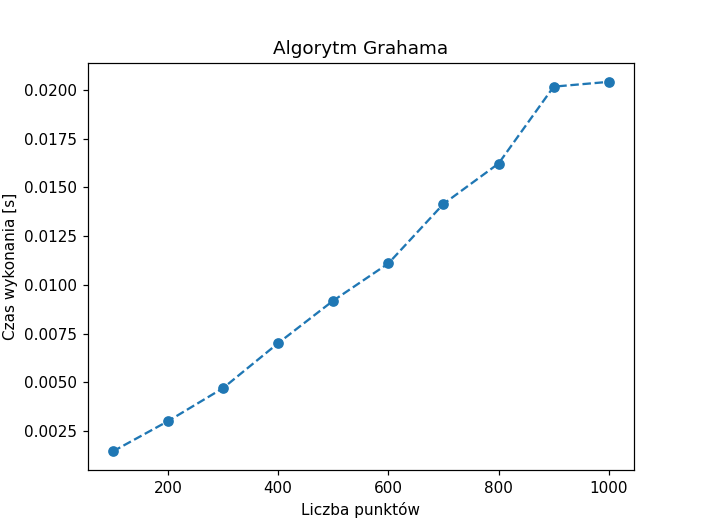

In [5]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algortym "górna-dolna"
<a id="pomiary-kolo-gornadolna"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


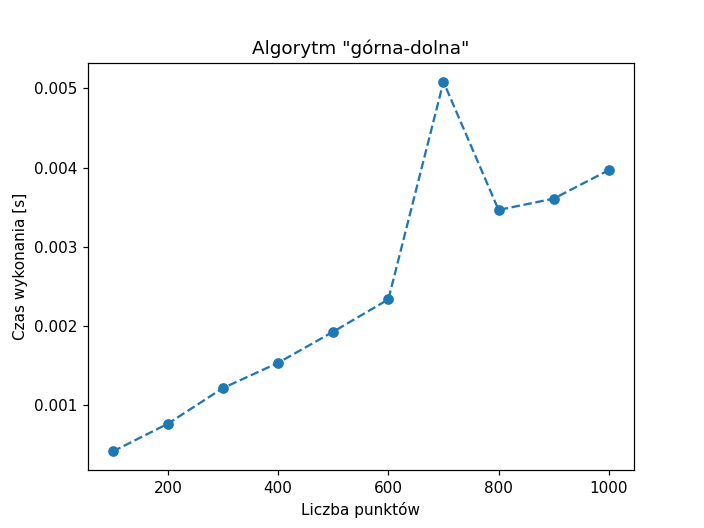

In [6]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

### Algorytm Chana
<a id="pomiary-kolo-chan"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


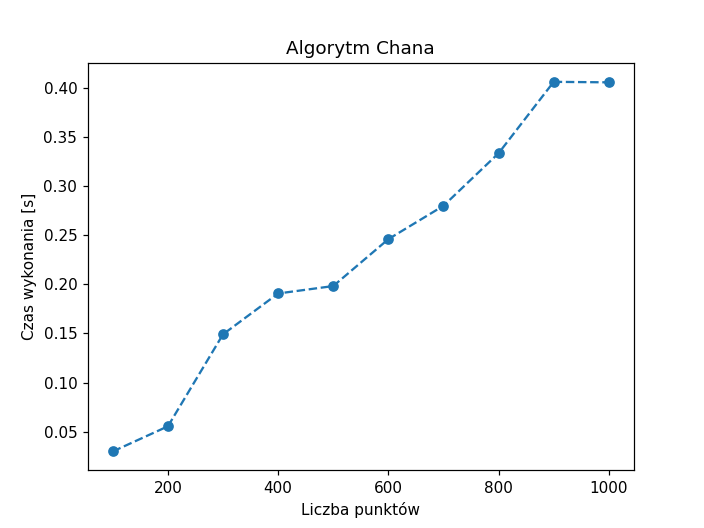

In [7]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

### Algorytm QuickHull
<a id="pomiary-kolo-quickhull"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


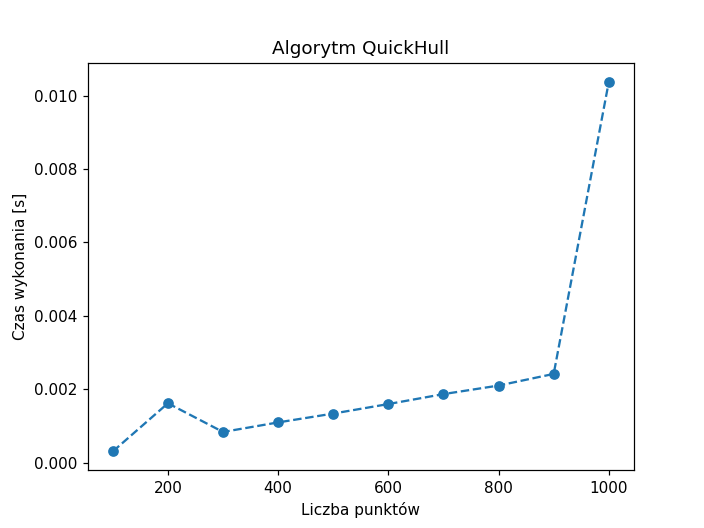

In [8]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

### Algorytm dziel i zwyciężaj
<a id="pomiary-kolo-dziel"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


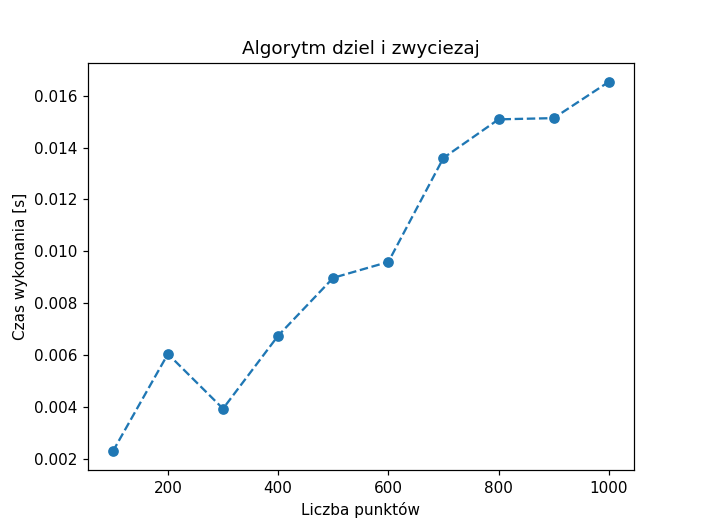

In [9]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm dziel i zwyciezaj')

plt.show()

### Algorytm przyrostowy
<a id="pomiary-kolo-przyrost"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


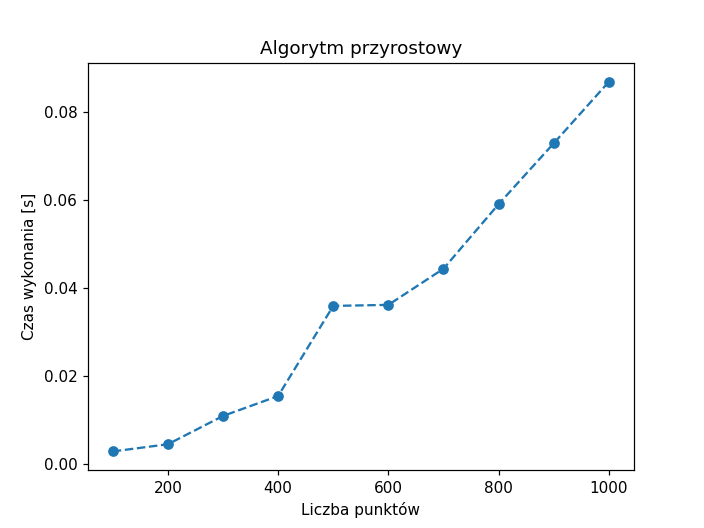

In [10]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[5]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm przyrostowy')

plt.show()

### Algorytm Jarvisa
<a id="pomiary-kolo-jarvis"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


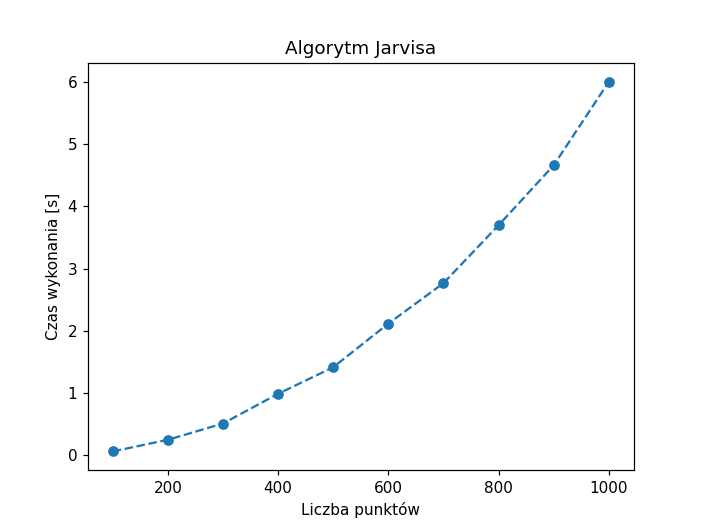

In [11]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[6]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Ujęcie zbiorcze
<a id="pomiary-kolo-zbiorczy"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


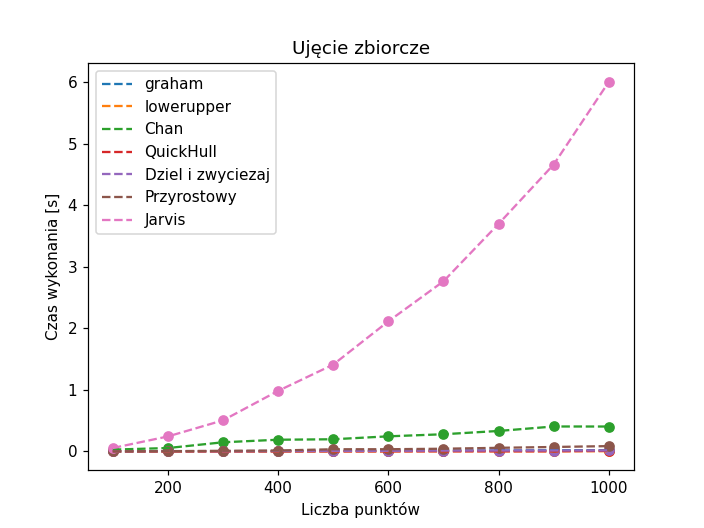

In [14]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_b))], exectimes_b, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Dziel i zwyciezaj', 'Przyrostowy', 'Jarvis'))
plt.show()

### Ujęcie zbiorcze bez algorytmu Jarvisa
<a id="pomiary-kolo-zbiorczy-2"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


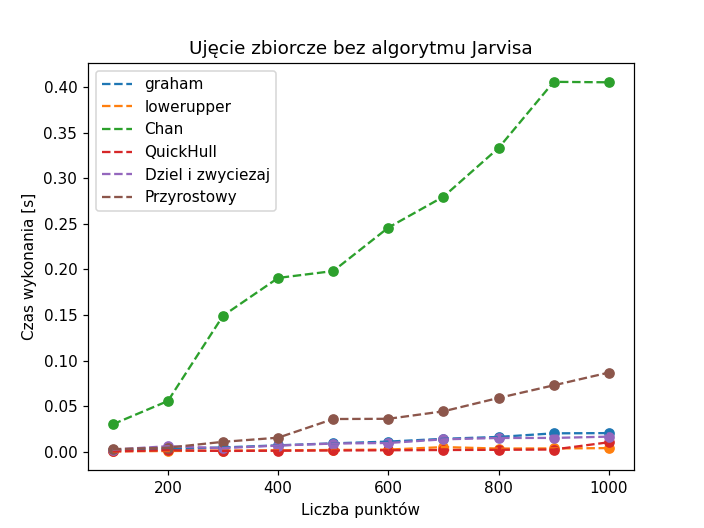

In [16]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_b) - 1)], exectimes_b[:len(exectimes_b)-1], 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze bez algorytmu Jarvisa')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Dziel i zwyciezaj', 'Przyrostowy'))
plt.show()

### Losowy rozkład na prostokącie
<a id="pomiary-prost"></a>
[Spis treści](#spis)

In [17]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 10 + i * 100 for i in range(10) ]
funcs = [graham, lower_upper, chan, quickHull, divide_conq, increase_with_sorting, jarvis]

exectimes_c = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeCset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is divide_conq:
            print(func, n)
            exectimes_c[fi][i] = avg_exec_time(func, n // 20 + 1, points=points)
            continue
        
        print(func, n)
        exectimes_c[fi][i] = avg_exec_time(func, points=points.copy())
        
save_data_csv('./tests/rect', exectimes_c)
pprint(exectimes_c)

<function graham at 0x7fe72587f040> 10
<function lower_upper at 0x7fe725898820> 10
<function chan at 0x7fe7258980d0> 10
(0, 1)
(0, 1)
(2, 2)
(2, 2)
(0, 2)
(0, 2)
(1, 1)
(1, 1)
(0, 1)
(0, 1)
(0, 2)
(0, 2)
(0, 3)
(0, 3)
(0, 4)
(0, 4)
(0, 5)
(0, 5)
(0, 6)
(0, 6)
(0, 0)
<function quickHull at 0x7fe725898c10> 10
<function divide_conq at 0x7fe72587fc10> 10
<function increase_with_sorting at 0x7fe7258983a0> 10
<function jarvis at 0x7fe72586c430> zmieniam na np.array
<function jarvis at 0x7fe72586c430> 10
<function graham at 0x7fe72587f040> 110
<function lower_upper at 0x7fe725898820> 110
<function chan at 0x7fe7258980d0> 110
(0, 1)
(0, 1)
(25, 1)
(25, 1)
(23, 2)
(23, 2)
(22, 1)
(22, 1)
(0, 1)
(0, 1)
(6, 2)
(6, 2)
(5, 2)
(5, 2)
(3, 3)
(3, 3)
(6, 4)
(6, 4)
(4, 4)
(4, 4)
(2, 4)
(2, 4)
(3, 5)
(3, 5)
(6, 6)
(6, 6)
(5, 6)
(5, 6)
(2, 6)
(2, 6)
(4, 7)
(4, 7)
(6, 0)
(6, 0)
(3, 0)
(3, 0)
(2, 1)
(2, 1)
(6, 2)
(6, 2)
(0, 1)
(0, 1)
(0, 2)
(0, 2)
(0, 3)
(0, 3)
(0, 4)
(0, 4)
(0, 5)
(0, 5)
(0, 6)
(0, 6)
(0, 

(0, 1)
(0, 1)
(2, 2)
(2, 2)
(0, 2)
(0, 2)
(1, 3)
(1, 3)
(2, 4)
(2, 4)
(1, 4)
(1, 4)
(2, 5)
(2, 5)
(1, 6)
(1, 6)
(2, 6)
(2, 6)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(2, 0)
(2, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(2, 2)
(2, 2)
(0, 2)
(0, 2)
(1, 3)
(1, 3)
(2, 4)
(2, 4)
(1, 4)
(1, 4)
(2, 5)
(2, 5)
(1, 6)
(1, 6)
(2, 6)
(2, 6)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(2, 0)
(2, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(2, 2)
(2, 2)
(0, 2)
(0, 2)
(1, 3)
(1, 3)
(2, 4)
(2, 4)
(1, 4)
(1, 4)
(2, 5)
(2, 5)
(1, 6)
(1, 6)
(2, 6)
(2, 6)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(2, 0)
(2, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(2, 2)
(2, 2)
(0, 2)
(0, 2)
(1, 3)
(1, 3)
(2, 4)
(2, 4)
(1, 4)
(1, 4)
(2, 5)
(2, 5)
(1, 6)
(1, 6)
(2, 6)
(2, 6)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(2, 0)
(2, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(2, 2)
(2, 2)
(0, 2)
(0, 2)
(1, 3)
(1, 3)
(2, 4)
(2, 4)
(1, 4)
(1, 4)
(2, 5)
(2, 5)
(1, 6)
(1, 6)
(2, 6)
(2, 6)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(2, 0)
(2, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(2, 2)
(2, 2)
(0, 2)
(0, 2)
(1, 3)
(1, 3)
(2, 4)
(2, 4)
(1, 4)
(1, 4)
(2, 5)

<function increase_with_sorting at 0x7fe7258983a0> 810
<function jarvis at 0x7fe72586c430> zmieniam na np.array
<function jarvis at 0x7fe72586c430> 810
<function graham at 0x7fe72587f040> 910
<function lower_upper at 0x7fe725898820> 910
<function chan at 0x7fe7258980d0> 910
(0, 1)
(0, 1)
(225, 1)
(225, 1)
(223, 1)
(223, 1)
(220, 2)
(220, 2)
(0, 1)
(0, 1)
(56, 2)
(56, 2)
(55, 2)
(55, 2)
(54, 2)
(54, 2)
(53, 2)
(53, 2)
(51, 2)
(51, 2)
(52, 2)
(52, 2)
(56, 4)
(56, 4)
(52, 4)
(52, 4)
(56, 6)
(56, 6)
(55, 6)
(55, 6)
(54, 6)
(54, 6)
(51, 6)
(51, 6)
(40, 0)
(40, 0)
(12, 6)
(12, 6)
(54, 7)
(54, 7)
(0, 1)
(0, 1)
(3, 2)
(3, 2)
(2, 2)
(2, 2)
(0, 3)
(0, 3)
(3, 4)
(3, 4)
(1, 4)
(1, 4)
(0, 5)
(0, 5)
(3, 6)
(3, 6)
(2, 6)
(2, 6)
(2, 7)
(2, 7)
(3, 0)
<function quickHull at 0x7fe725898c10> 910
<function divide_conq at 0x7fe72587fc10> 910
<function increase_with_sorting at 0x7fe7258983a0> 910
<function jarvis at 0x7fe72586c430> zmieniam na np.array
<function jarvis at 0x7fe72586c430> 910
array([[2.515309

### Algorytm Grahama
<a id="pomiary-prost-graham"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


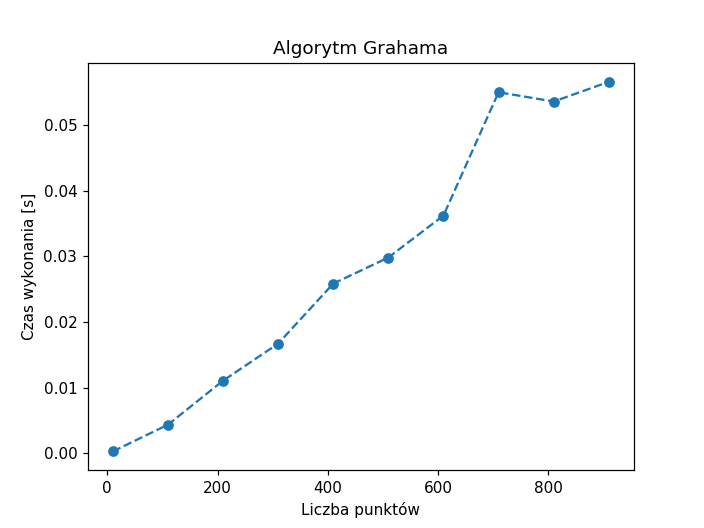

In [18]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algorytm "górna-dolna"
<a id="pomiary-prost-gornadolna"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


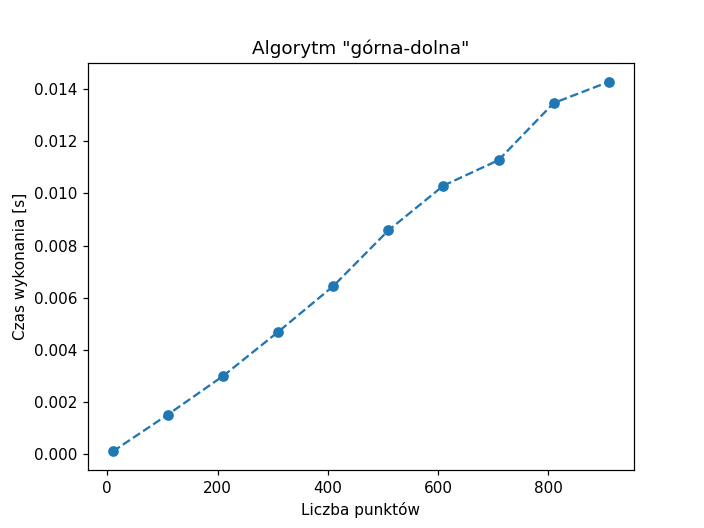

In [19]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

### Algorytm Chana
<a id="pomiary-prost-chan"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


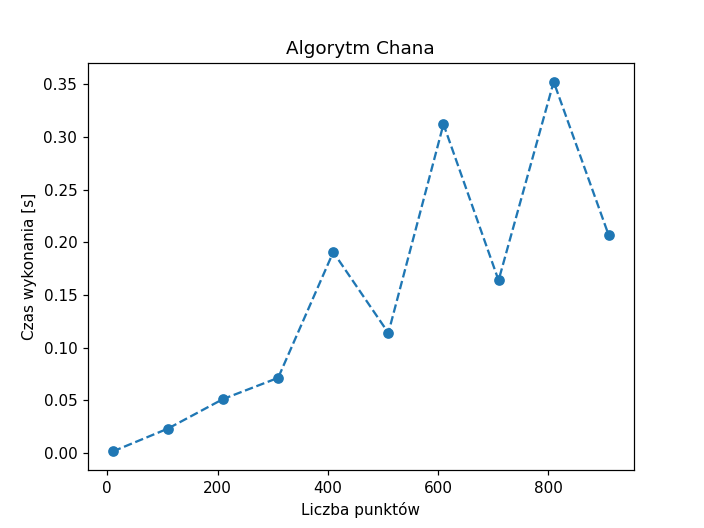

In [20]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

### Algorytm QuickHull
<a id="pomiary-prost-quickhull"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


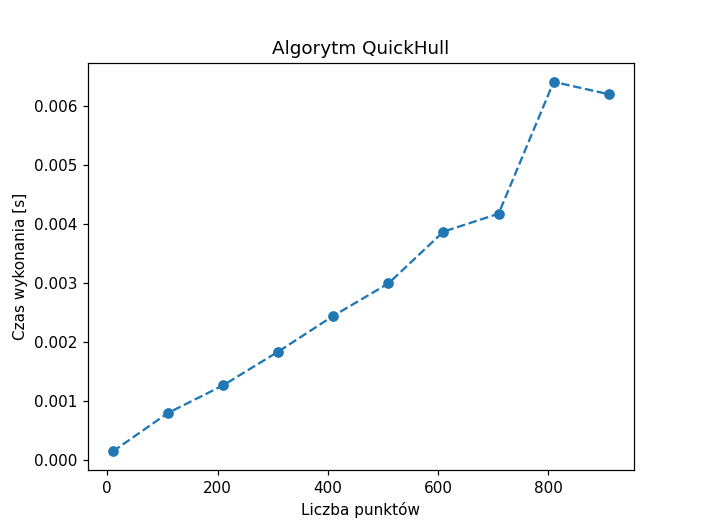

In [21]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

### Algorytm dziel i zwyciężaj 
<a id="pomiary-prost-dziel"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


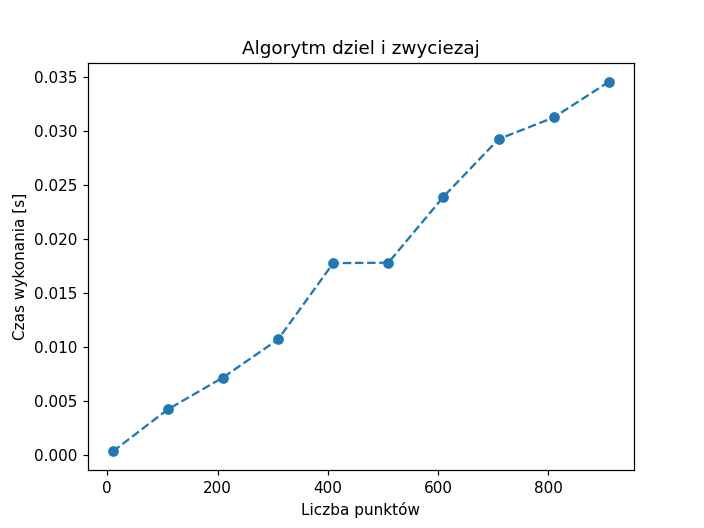

In [22]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm dziel i zwyciezaj')

plt.show()

### Algorytm przyrostowy
<a id="pomiary-prost-przyrost"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


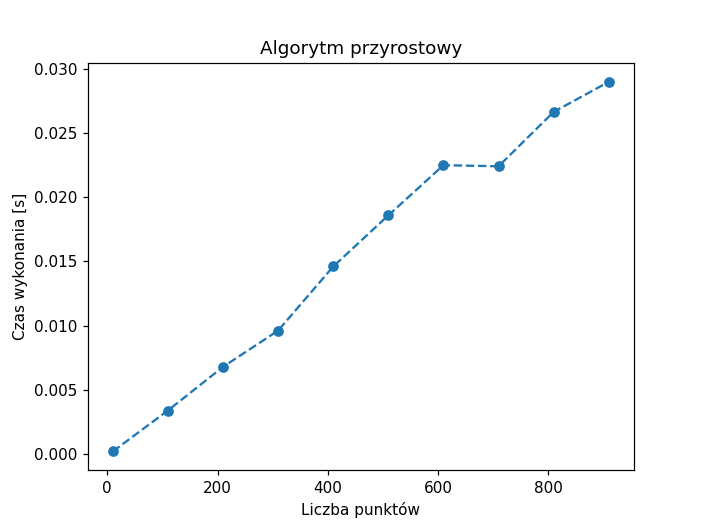

In [23]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[5]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm przyrostowy')

plt.show()

### Algorytm Jarvisa
<a id="pomiary-prost-jarvis"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


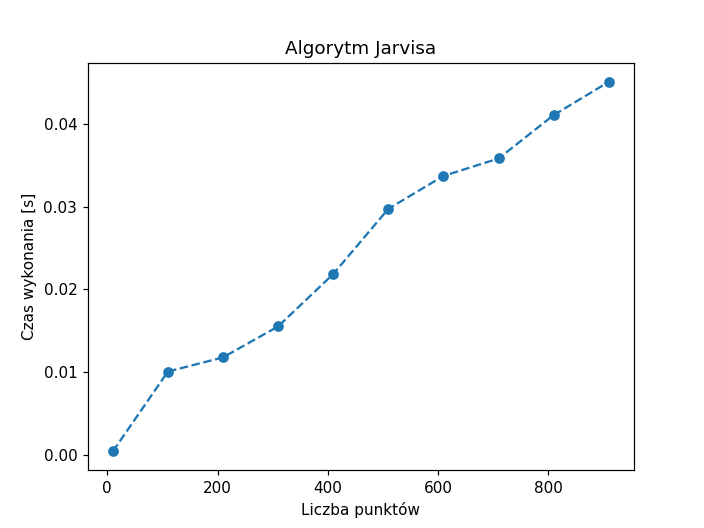

In [24]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[6]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Ujęcie zbiorcze
<a id="pomiary-prost-zbiorczy"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


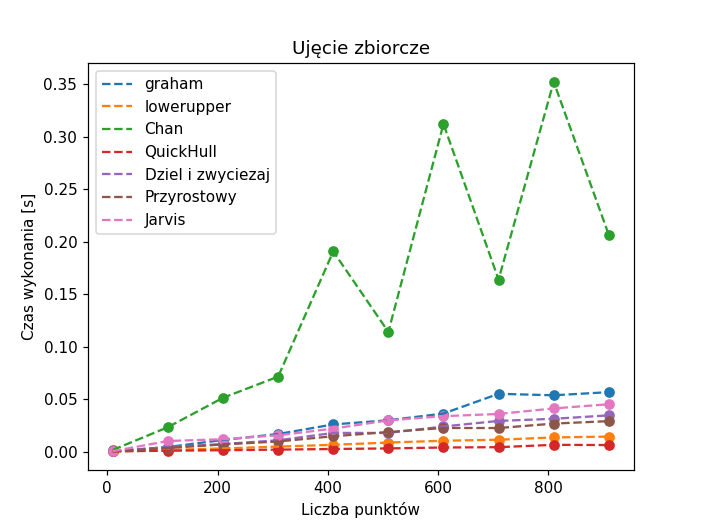

In [25]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_c))], exectimes_c, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Dziel i zwyciezaj', 'Przyrostowy', 'Jarvis'))
plt.show()

### Ujęcie zbiorcze bez algorytmu Chana
<a id="pomiary-prost-zbiorczy-2"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


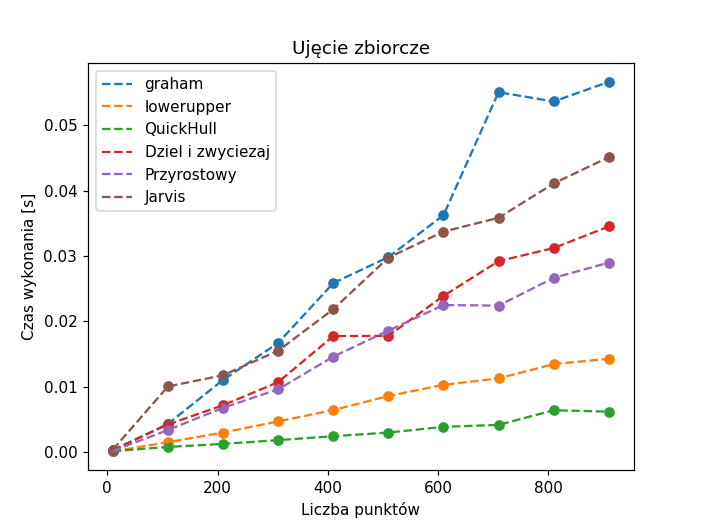

In [27]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_c) - 1)], [exectimes_c[i] for i in range(len(exectimes_c)) if i not in [2]], 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'QuickHull', 'Dziel i zwyciezaj', 'Przyrostowy', 'Jarvis'))
plt.show()

### Wierzchołki kwadratu, jego przekątne i dwa boki o wspólnym wierzchołku
<a id="pomiary-kw"></a>
[Spis treści](#spis)

In [37]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 1000 + i * 1000 for i in range(10) ]
funcs = [graham, lower_upper, chan, quickHull, divide_conq, increase_with_sorting, jarvis]

exectimes_d = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeDset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is divide_conq:
            exectimes_d[fi][i] = avg_exec_time(func, n // 20 + 1, points=points)
            continue
        
        print(func, n)
        exectimes_d[fi][i] = avg_exec_time(func, points=points.copy())
        
save_data_csv('./tests/square', exectimes_a)
        
    
pprint(exectimes_d)

<function graham at 0x7fe72587f040> 1000
<function lower_upper at 0x7fe725898820> 1000
<function chan at 0x7fe7258980d0> 1000
(0, 1)
(0, 1)
(1000, 1)
(1000, 1)
(999, 1)
(999, 1)
(998, 1)
(998, 1)
(0, 1)
(0, 1)
(250, 2)
(250, 2)
(249, 1)
(249, 1)
(250, 2)
(250, 2)
(249, 1)
(249, 1)
(250, 2)
(250, 2)
(249, 1)
(249, 1)
(250, 2)
(250, 2)
(249, 1)
(249, 1)
(250, 2)
(250, 2)
(249, 1)
(249, 1)
(250, 2)
(250, 2)
(249, 1)
(249, 1)
(250, 2)
(250, 2)
(249, 1)
(249, 1)
(250, 2)
(250, 2)
(0, 1)
(0, 1)
(14, 2)
(14, 2)
(12, 2)
(12, 2)
(6, 2)
(6, 2)
(1, 1)
(1, 1)
(2, 3)
(2, 3)
(3, 2)
(3, 2)
(15, 1)
(15, 1)
(13, 1)
(13, 1)
(7, 0)
<function quickHull at 0x7fe725898c10> 1000
<function increase_with_sorting at 0x7fe7258983a0> 1000
<function jarvis at 0x7fe72586c430> zmieniam na np.array
<function jarvis at 0x7fe72586c430> 1000
<function graham at 0x7fe72587f040> 2000
<function lower_upper at 0x7fe725898820> 2000
<function chan at 0x7fe7258980d0> 2000
(0, 1)
(0, 1)
(2000, 1)
(2000, 1)
(1997, 1)
(1997, 1)
(

(0, 1)
(0, 1)
(7000, 1)
(7000, 1)
(6999, 1)
(6999, 1)
(6997, 1)
(6997, 1)
(0, 1)
(0, 1)
(1750, 2)
(1750, 2)
(1749, 1)
(1749, 1)
(1750, 2)
(1750, 2)
(1749, 1)
(1749, 1)
(1750, 2)
(1750, 2)
(1749, 1)
(1749, 1)
(1750, 2)
(1750, 2)
(1749, 1)
(1749, 1)
(1750, 2)
(1750, 2)
(1749, 1)
(1749, 1)
(1750, 2)
(1750, 2)
(1749, 1)
(1749, 1)
(1750, 2)
(1750, 2)
(1749, 1)
(1749, 1)
(1750, 2)
(1750, 2)
(0, 1)
(0, 1)
(108, 2)
(108, 2)
(106, 2)
(106, 2)
(92, 2)
(92, 2)
(1, 1)
(1, 1)
(2, 3)
(2, 3)
(3, 2)
(3, 2)
(109, 1)
(109, 1)
(107, 1)
(107, 1)
(93, 1)
<function quickHull at 0x7fe725898c10> 7000
<function increase_with_sorting at 0x7fe7258983a0> 7000
<function jarvis at 0x7fe72586c430> zmieniam na np.array
<function jarvis at 0x7fe72586c430> 7000
<function graham at 0x7fe72587f040> 8000
<function lower_upper at 0x7fe725898820> 8000
<function chan at 0x7fe7258980d0> 8000
(0, 1)
(0, 1)
(8000, 1)
(8000, 1)
(7999, 1)
(7999, 1)
(7998, 1)
(7998, 1)
(0, 1)
(0, 1)
(2000, 2)
(2000, 2)
(1999, 2)
(1999, 2)
(1979, 3

NameError: name 'exectimes_a' is not defined

### Algorytm Grahama
<a id="pomiary-kw-graham"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


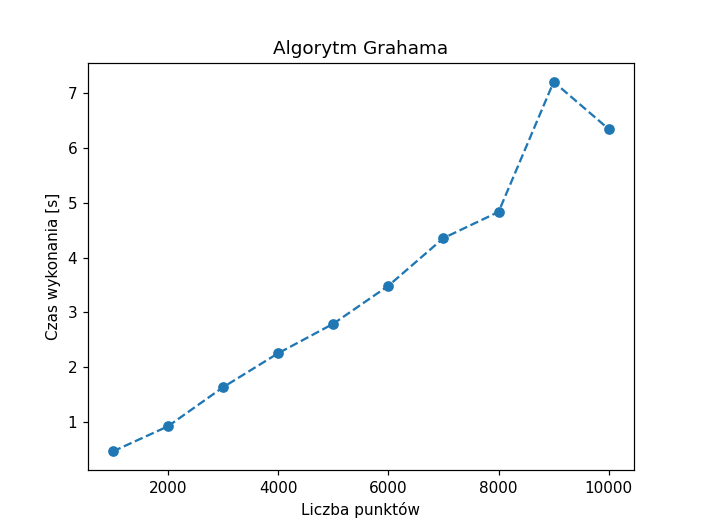

In [38]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algorytm "górna-dolna"
<a id="pomiary-kw-gornadolna"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


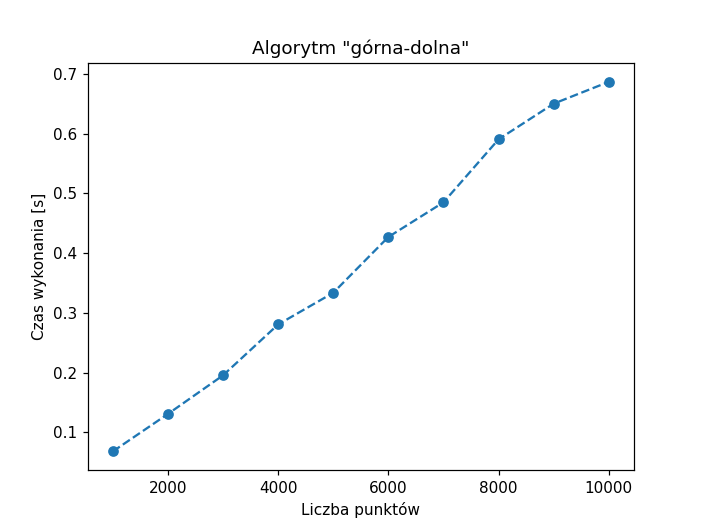

In [39]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

### Algorytm Chana
<a id="pomiary-kw-chan"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


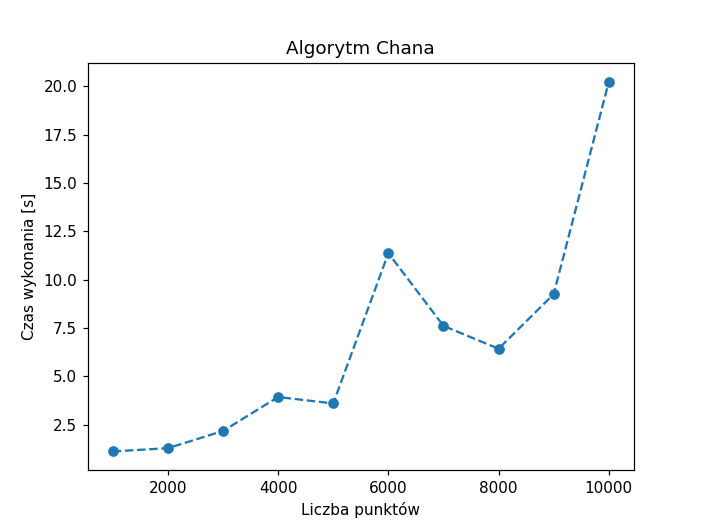

In [40]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

### Algorytm QuickHull
<a id="pomiary-kw-quickhull"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


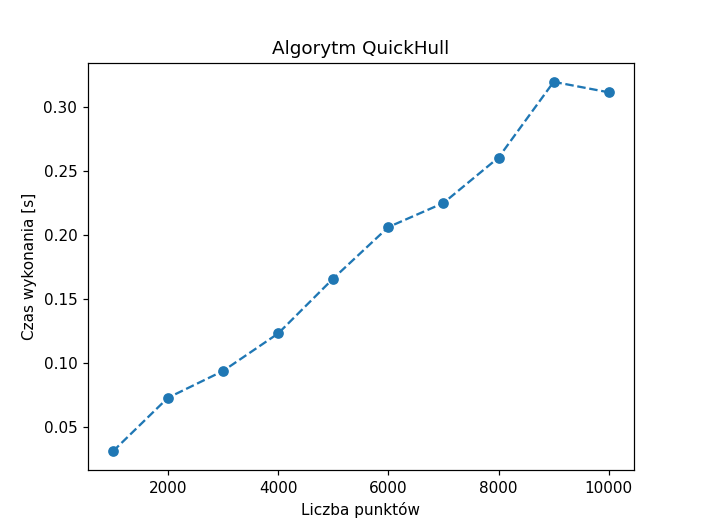

In [41]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

### Algorytm dziel i zwyciężaj
<a id="pomiary-kw-dziel"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


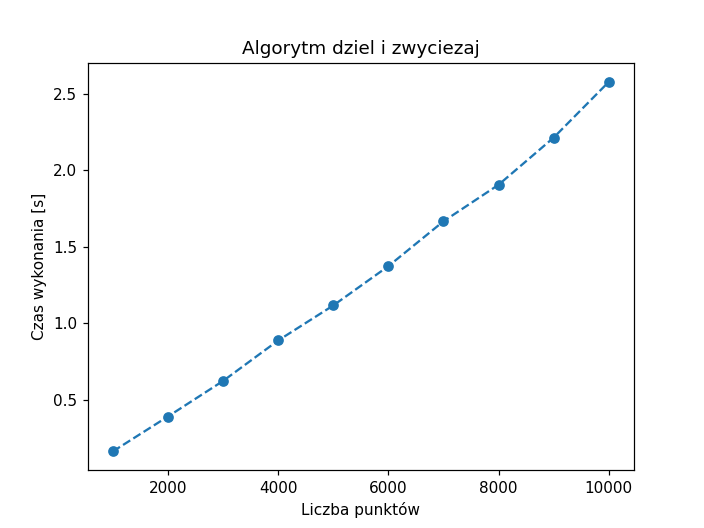

In [42]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm dziel i zwyciezaj')

plt.show()

### Algorytm przyrostowy
<a id="pomiary-kw-przyrost"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


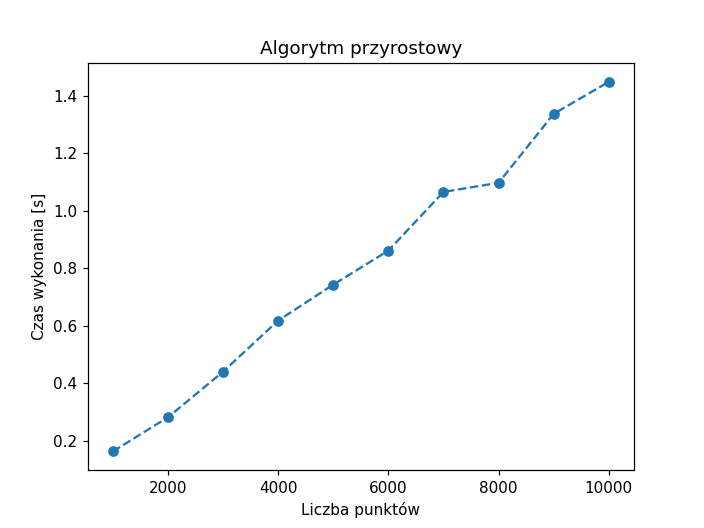

In [43]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[5]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm przyrostowy')

plt.show()

### Algorytm Jarvisa
<a id="pomiary-kw-jarvis"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


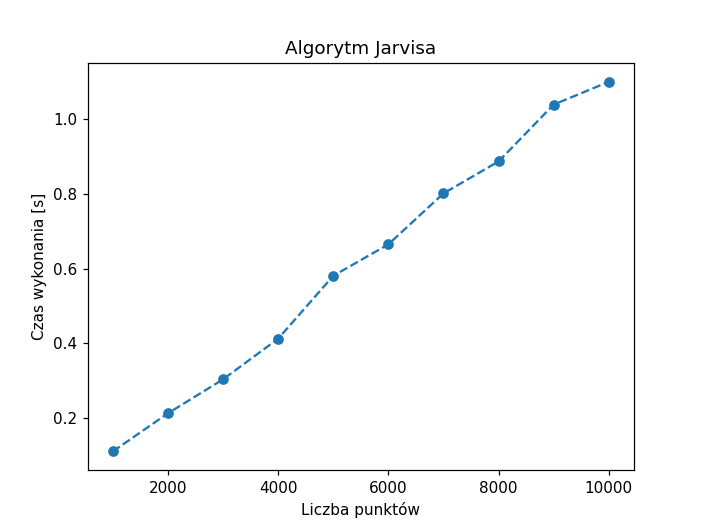

In [44]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[6]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Ujęcie zbiorcze
<a id="pomiary-kw-zbiorczy"></a>
[Spis treści](#spis)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


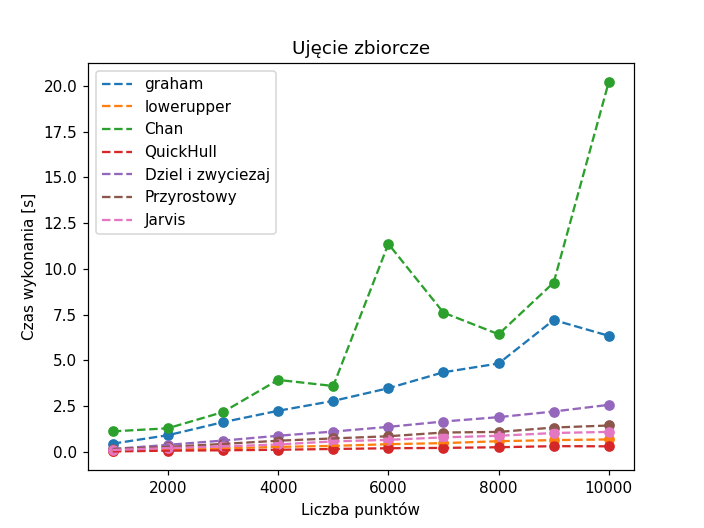

In [47]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_d))], exectimes_d, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Dziel i zwyciezaj', 'Przyrostowy', 'Jarvis'))
plt.show()

<a id='section_id'></a>

### Ujęcie zbiorcze bez algorytmu Chana
<a id="pomiary-kw-zbiorczy-2"></a>
[Spis treści](#spis)


<IPython.core.display.Javascript object>


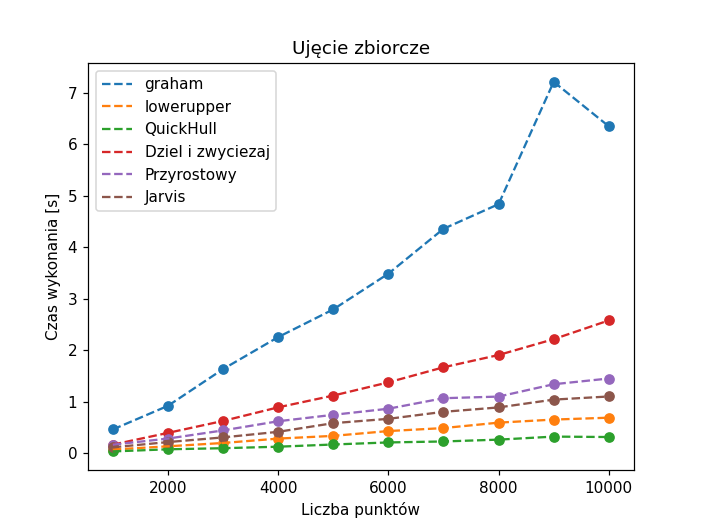

In [48]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_d) -1)], [exectimes_d[i] for i in range(len(exectimes_d)) if i not in [2]], 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'QuickHull', 'Dziel i zwyciezaj', 'Przyrostowy', 'Jarvis'))
plt.show()